In [1]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import glob as glob

label = {'color':  'black',
        'weight': 'normal',
        'size': 10,
        }
title = {'color':  'black',
        'weight': 'normal',
        'size': 12,
        }

In [2]:
files = glob.glob('./imp_acc/run*/snp50.mafcorr.csv')

In [26]:
mafcor = pd.read_csv(files[0], index_col=[0], usecols=[0,1,4])
mafcor.head()

NameError: name 'NaN' is not defined

In [4]:
snp50 = []
for xx in files:
    #colname = str('/'.join(xx.split('/')[1:3]))
    df = pd.read_csv(xx, index_col=[0], usecols=[0,1,4])
    df = df.rename(columns = {'correlation':'/'.join(xx.split('/')[2:3])})
    snp50.append(df)
combined = pd.concat(snp50, axis=1)  

In [5]:
mafruns = (combined.groupby(level= 0, axis=1)).sum()
mafruns.tail()

,MAF,run1,run10,run11,run12,run13,run14,run15,run16,run2,run4,run5,run6,run7,run8,run9
9:99987947,5.872500,0.981024,0.981678,0.982281,0.977582,0.975606,0.984883,0.979323,0.986088,0.969424,0.979712,0.966184,0.984697,0.977295,0.971214,0.982364
9:99991235,0.007641,NaN,0.003050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9:99995619,5.368500,0.994347,0.990818,0.990090,0.985703,0.983376,0.990188,0.990477,0.994027,0.984546,0.987372,0.988539,0.992102,0.985870,0.994136,0.990125
9:9999897,5.655000,0.992926,0.979699,0.983799,0.970412,0.970505,0.956667,0.997112,0.991883,0.990222,0.995793,0.986316,0.998327,0.953373,0.979042,0.956272
9:99999354,4.971000,0.975037,0.969830,0.974516,0.962823,0.960491,0.967361,0.976102,0.975269,0.965399,0.980496,0.970748,0.976225,0.968155,0.972962,0.964998


In [6]:
mafruns['run2'].isnull().values.ravel().sum()

196879

In [7]:
MAF = mafcor['MAF']
plotter = pd.DataFrame(MAF)
plotter["ACC"] = mafruns["run2"]
bins = np.linspace(0,.5,20)
plotter_na = plotter[(-2<plotter['ACC']) & (plotter['ACC']<2)]
# a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))
# mean_bin=a_bins.mean()
# del mean_bin.index.name

In [8]:
plotter_na.shape

(676860, 2)

In [9]:
list(mafruns.columns)[1:]

['run1',
 'run10',
 'run11',
 'run12',
 'run13',
 'run14',
 'run15',
 'run16',
 'run2',
 'run4',
 'run5',
 'run6',
 'run7',
 'run8',
 'run9']

In [42]:
names = ['run2','run7','run13']

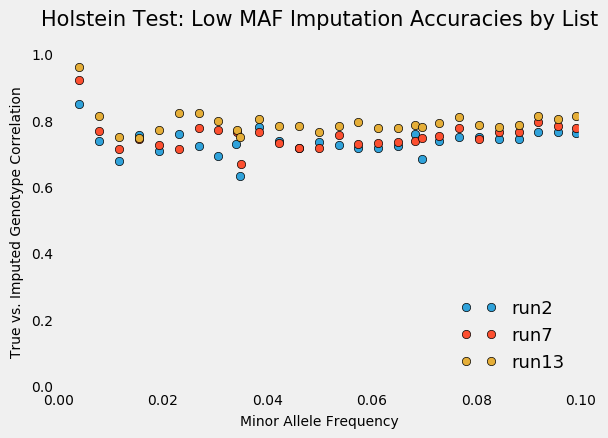

In [47]:
for xx in names:
    MAF = mafruns['MAF']
    plotter = pd.DataFrame(MAF)
    plotter[xx] = mafruns[xx]
    bins = np.linspace(0,.1,30)
    plotter_na = plotter[(-2<plotter[xx]) & (plotter[xx]<2)]
    a_bins = plotter_na.groupby(pd.cut(plotter_na['MAF'],bins))
    mean_bin=a_bins.mean()
    del mean_bin.index.name
    plt.plot(mean_bin['MAF'], mean_bin[xx], 'o')
    plt.axis([0,0.1,0,1])
    plt.grid(alpha = 0.0)
    plt.legend(loc = 'lower right', fontsize= 13)
    plt.ylabel('True vs. Imputed Genotype Correlation', fontsize=10, color='k')
    plt.xlabel('Minor Allele Frequency', fontsize=10, color='k')
    plt.tick_params(labelsize=10)
    plt.title('Holstein Test: Low MAF Imputation Accuracies by List\n', fontsize=15)

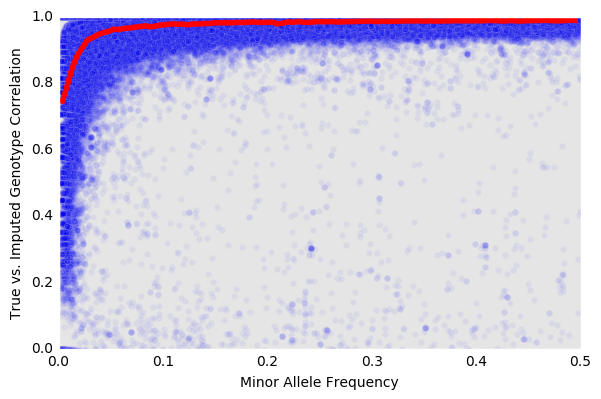

In [47]:
plt.style.use('ggplot')
plt.scatter(mafcor["MAF"], mafcor['correlation'], alpha = 0.05)
plt.plot(mean_bin['MAF'], mean_bin['ACC'], color = 'r')
plt.axis([0,0.5,0,1])
plt.grid(alpha = 0.0)
plt.ylabel('True vs. Imputed Genotype Correlation', fontsize=10, color='k')
plt.xlabel('Minor Allele Frequency', fontsize=10, color='k')
#plt.title('900K Imputation Accuracy by MAF\n' + name + ' Imputed - '+ run)
plt.tick_params(colors='k')

## We're missing quite a few imputation accuracies on certain chromosomes
* Looking chromosome by chromosome to see # of missing imputation accruacies
* Uses the .csv correlations to find number of missings

### SNP50 run1 example

In [11]:
ex = pd.read_csv('./imp_acc/run1/snp50.chr1.snp_correlations.csv', index_col=[0])

In [22]:
chroms = glob.glob('./imp_acc/run8/snp50.chr*.snp_correlations.csv')


In [23]:
missing = {}
for xx in chroms:
    chrom = xx.split('/')[3].split('.')[1]
    assay = xx.split('/')[3].split('.')[0]
    df = pd.read_csv(xx)
    miss = df['correlation'].isnull().sum()/len(df.correlation)
    missing[chrom] = miss

# F250 & HD MAF Plots

In [28]:
f250 = pd.read_table("./snp_stats/227234.170519.1970.GGPF250.frq", delim_whitespace=True)

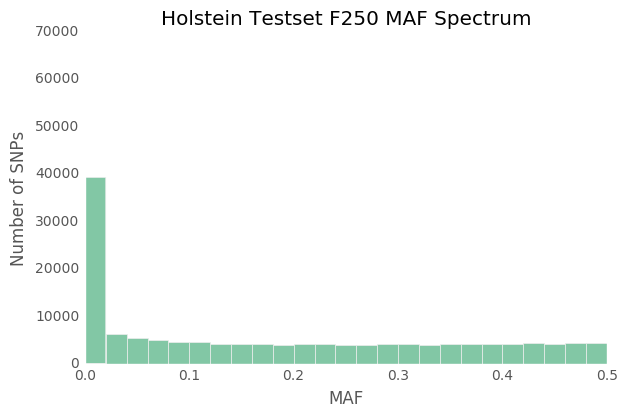

In [58]:
plt.style.use("ggplot")
ax = f250.MAF.plot.hist(bins = 50, xlim = (0,0.5), color = "#82c7a5")
ax.set_axis_bgcolor('white')
ax.set_title("Holstein Testset F250 MAF Spectrum")
ax.set_xlabel("MAF")
ax.set_ylabel("Number of SNPs")


In [60]:
hd = pd.read_table("./snp_stats/777962.170519.1970.HD.frq", delim_whitespace=True)

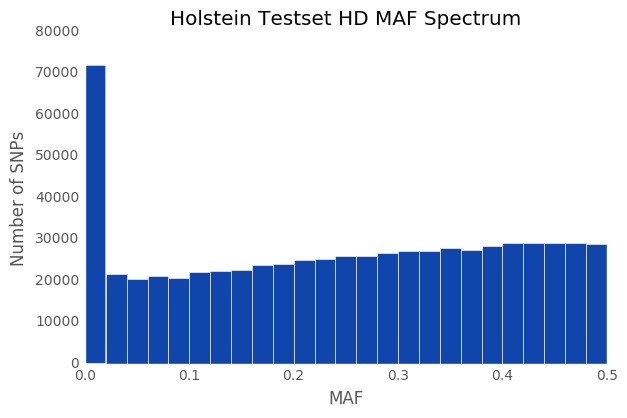

In [66]:
plt.style.use("ggplot")
ax = hd.MAF.plot.hist(bins = 50, xlim = (0,0.5), color = "#1045ac")
ax.set_axis_bgcolor('white')
ax.set_title("Holstein Testset HD MAF Spectrum")
ax.set_xlabel("MAF")
ax.set_ylabel("Number of SNPs")


In [26]:
run = '6'
IMPREFS = ['hd', 'f250']

In [27]:
list1 = ['1', '2', '3', '4', '5', '8', '17', '30']
list2 = ['6','7', '9', '10', '11', '18']
list3 = ['12', '13', '14', '15', '16', '19']
if run in list1:
	group = 'list1'
if run in list2:
	group = 'list2'
if run in list3:
	group = 'list3'
assay = ['2', '5', '7', '10', '13', '15', '4', '9', '14', '17', '18', '19', '30']
combined = ['1', '6', '8', '11', '12', '16']
if run in assay:
	directory = 'assay_chrsplit/'
	sample = sample
	location = directory + sample + '.'+ group + '.chr20.bed'
if run in combined:
	directory = 'merged_chrsplit/'
	sample = 'run' + run +'/hol_testset.merge'
	location = directory + sample + '.chr20.bed'

In [28]:
location

'merged_chrsplit/run6/hol_testset.merge.chr20.bed'